In [1]:
import csv

In [2]:
# t=open('Indian_Fiction_in_English_-_Course_Introduction_1_.txt','r')
t=open('Indian Fiction In English Course Introduction.txt','r')
# t=open('AI ML.txt','r')
with t:
    txt=t.read()

In [3]:
txt.split(".")

['Hello everyone',
 ' Thank you for your interest in this NPTEL course titled Indian Fiction in English',
 ' And Dr Merin Simi Raj, I teach in the department of humanities and social sciences at IIT Madras',
 ' To give you a brief overview of this course this is a 12-week course that spread across 30 hours of teaching',
 ' This has been pitched at the post graduate level',
 ' I must also tell you that we have been offering this course in the department of humanities and social sciences at IIT Madras for the last of four years and the course has been conceived in such a way that it also generates research interests and students who have interest in highest studies and also on students who have an interest in honouring their research Acumen, there are no prerequisites for this',
 ' I would have ever look forward to for a lot of readiness from your side to learn and also willingness to read',
 ' Apart from that, I also need to reiterate what course does not do, here we will not be providi

In [4]:
f=open('TextOutput.csv','w+')
with f:
    writer = csv.writer(f)
    writer.writerow(["sentence"])
    for i in txt.split("."):
        if i != "":
            writer.writerow([i])

In [5]:
import pandas as pd

In [6]:
textOP=pd.read_csv('TextOutput.csv')

In [7]:
textOP

,sentence
0,Hello everyone
1,Thank you for your interest in this NPTEL cou...
2,"And Dr Merin Simi Raj, I teach in the departm..."
3,To give you a brief overview of this course t...
4,This has been pitched at the post graduate level
5,I must also tell you that we have been offeri...
6,I would have ever look forward to for a lot o...
7,"Apart from that, I also need to reiterate wha..."
8,This is not a course on reading stories and s...
9,One of the first things that we shall be doin...


In [8]:
textOP['sentence'].sample(5)

28     If you're a student of English or if you are ...
9      One of the first things that we shall be doin...
2      And Dr Merin Simi Raj, I teach in the departm...
5      I must also tell you that we have been offeri...
17    We shall be focusing on to other major phases ...
Name: sentence, dtype: object

In [9]:
import spacy
from tqdm import tqdm

In [10]:
nlp=spacy.load('en_core_web_sm')

In [11]:
doc = nlp(textOP['sentence'][14])

In [12]:
for tok in doc:
    print(tok.text, "...", tok.dep_)

  ... 
We ... nsubj
should ... aux
first ... advmod
be ... aux
looking ... ROOT
at ... prep
the ... det
historical ... amod
context ... pobj
and ... cc
looking ... conj
at ... prep
the ... det
certain ... amod
canonical ... amod
text ... pobj
which ... nsubj
of ... advmod
laid ... relcl
the ... det
foundations ... dobj
of ... prep
the ... det
chronological ... amod
and ... cc
historical ... conj
origins ... pobj
of ... prep
this ... det
genre ... pobj


In [13]:
from spacy.matcher import Matcher 
from spacy.tokens import Span 
from spacy import displacy 

# pd.set_option('display.max_colwidth', 200)

In [14]:
text=textOP.iloc[12][0]
doc = nlp(text) 
displacy.render(doc, style='dep',jupyter=True)
text

' So we will be unpacking this category and try to interrogate the various contestations and the various definitions that are available when terms of authorship study and in terms of looking at different kinds of genres and also talking about issues related to language and identity'

In [15]:
for tok in doc:
    print(tok.text)

 
So
we
will
be
unpacking
this
category
and
try
to
interrogate
the
various
contestations
and
the
various
definitions
that
are
available
when
terms
of
authorship
study
and
in
terms
of
looking
at
different
kinds
of
genres
and
also
talking
about
issues
related
to
language
and
identity


In [ ]:
# for i in range(len(textOP['sentence'])):
#     doc = nlp(textOP['sentence'][i])
#     for tok in doc:
#         print(tok.text, "...", tok.dep_,"...",tok.pos_)
#     print("sentance : ",i)

In [16]:
def get_entities(sent):
    ent1 = ""
    ent2 = ""

    prv_tok_dep = ""
    prv_tok_text = ""
    prefix = ""
    modifier = ""

    for tok in nlp(sent):
        if tok.dep_ != "punct":
            if tok.dep_ == "compound":
                prefix = tok.text
                if prv_tok_dep == "compound":
                    prefix = prv_tok_text + " "+ tok.text
        if tok.dep_.endswith("mod") == True:
            modifier = tok.text
        if prv_tok_dep == "compound":
            modifier = prv_tok_text + " "+ tok.text

        if tok.dep_.find("subj") == True:
            ent1 = modifier +" "+ prefix + " "+ tok.text
            prefix = ""
            modifier = ""
            prv_tok_dep = ""
            prv_tok_text = ""      
        if tok.dep_.find("obj") == True:
            ent2 = modifier +" "+ prefix +" "+ tok.text
        prv_tok_dep = tok.dep_
        prv_tok_text = tok.text
#         print("{},{},{},{},{},{}".format(ent1,ent2,prv_tok_dep,prv_tok_text,prefix,modifier))
    return [ent1.strip(), ent2.strip()]

In [17]:
get_entities(text)

['various  that', 'also authorship language']

In [18]:
get_entities("the film had 200 patents")

['film', '200  patents']

In [19]:
get_entities("the film had 200 well-known patents")

['film', 'known  patents']

In [20]:
get_entities("Sheldon Cooper has 3 PhDs")

['Sheldon Cooper Sheldon Cooper', '3  PhDs']

In [21]:
entity_pairs = []

for i in tqdm(textOP["sentence"]):
    entity_pairs.append(get_entities(i))

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 39.95it/s]


In [22]:
entity_pairs

[['', ''],
 ['', 'Indian Fiction Indian English'],
 ['Simi Raj Merin Simi I', 'IIT Madras IIT Madras'],
 ['12-week  that', '30  teaching'],
 ['This', 'graduate level post graduate level'],
 ['also  who', 'research Acumen research this'],
 ['forward  lot', 'side'],
 ['here  we', 'particular  text'],
 ['other  we', 'Indian Fiction study Indian English'],
 ['first  we', 'Indian Fiction Indian English'],
 ['who', 'Indian  origin'],
 ['English  we', 'other  English'],
 ['various  that', 'also authorship language'],
 ['We', 'major  angles'],
 ['canonical  which', 'chronological  genre'],
 ['critical  which', 'Meenakshi Mukherjee Meenakshi Mukherjee'],
 ['We', '19th fiction century'],
 ['We', 'major  post'],
 ['recent  we', 'Chandra Chatterjee Bankim Chandra Chatterjee'],
 ['hall', 'Allan Sealy Allan Zelaldinus'],
 ['literary  ground', 'summaries'],
 ['far  discipline', 'critical  tradition'],
 ['how  histroy', 'nationalist  histrography'],
 ['20th  which', 'such  colonialism'],
 ['pespective

In [23]:
import re
import pandas as pd
import bs4
import requests
# import spacy
from spacy import displacy

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [24]:
def get_relation(sent):
    doc = nlp(sent)
    matcher = Matcher(nlp.vocab)
    pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

    matcher.add("matching_1", None, pattern) 
    matches = matcher(doc)
    k = len(matches) - 1
    span = doc[matches[k][1]:matches[k][2]] 
    return(span.text)

In [25]:
get_relation("John completed the task")

'completed'

In [26]:
textOP['sentence'][4]

' This has been pitched at the post graduate level'

In [27]:
get_relation(textOP['sentence'][4])

'pitched at'

In [28]:
relations = [get_relation(i) for i in tqdm(textOP['sentence'])]

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 51.97it/s]


In [29]:
pd.Series(relations).value_counts()

is                     4
looking at             4
Thank                  2
unpacking              1
teach in               1
approaching            1
work                   1
Hello                  1
covered through        1
focusing on            1
looking of             1
looking at inherent    1
looking                1
pitched at             1
implies                1
wish                   1
ending                 1
look                   1
be of much             1
looking at various     1
enabled by             1
need                   1
're                    1
are                    1
dtype: int64

In [30]:
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [31]:
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

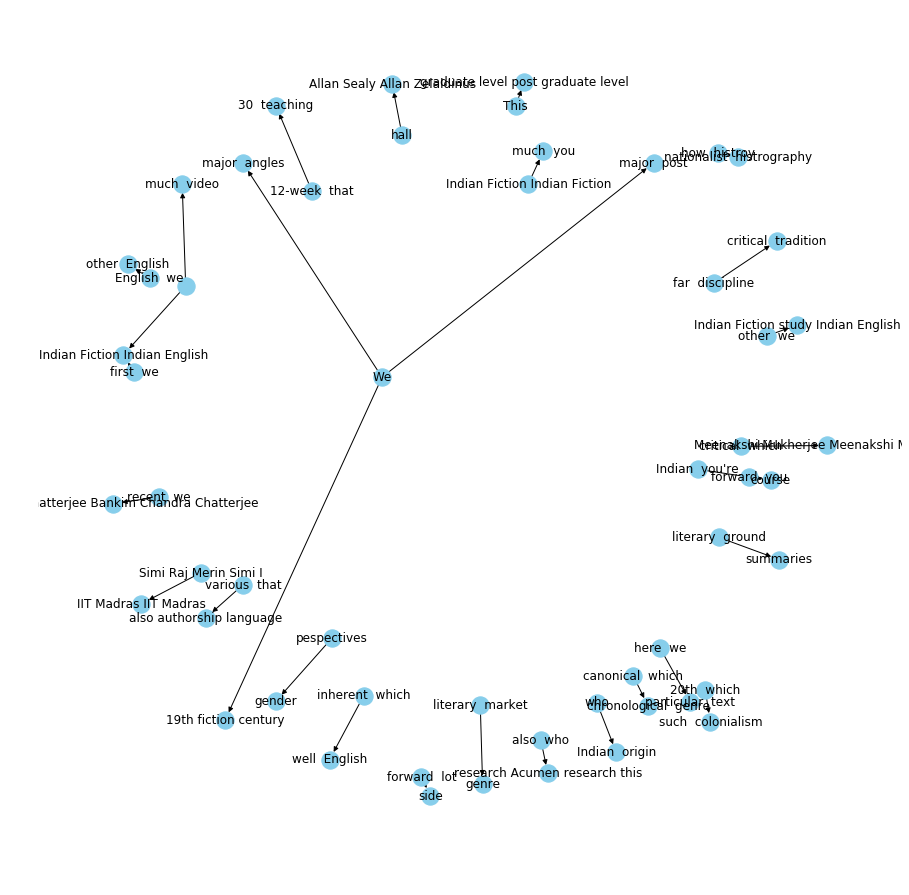

In [32]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()